Importing the libraries

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_columns", None)

Reading the data

In [270]:
df = pd.read_feather(r"..\data\olist_merged_dataset.feather")
region = pd.read_csv(r"..\data\states_region_brazil.csv")

In [271]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR


Since we already verifed in the "merging" notebook that 97% of all orders are delivered, we're going to focus only in the these orders.

In [272]:
df = df[df["order_status"] == "delivered"]

In [273]:
df.shape

(110840, 35)

In [274]:
df["order_status"].value_counts()

delivered    110840
Name: order_status, dtype: int64

Check for null values

In [275]:
df.isnull().sum().sort_values(ascending=False)

review_comment_title             97710
review_comment_message           64705
product_description_lenght        1545
product_category_name             1545
product_photos_qty                1545
product_name_lenght               1545
review_score                       827
review_id                          827
review_creation_date               827
review_answer_timestamp            827
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
product_weight_g                    18
order_approved_at                   15
order_delivered_customer_date        8
order_delivered_carrier_date         2
customer_state                       0
order_id                             0
customer_zip_code_prefix             0
seller_zip_code_prefix               0
seller_city                          0
customer_city                        0
order_purchase_timestamp             0
customer_unique_id                   0
order_estimated_delivery_

Dropping possible problematic rows with missing data



In [276]:
df.dropna(
    subset=[
        "product_length_cm",
        "product_height_cm",
        "product_width_cm",
        "product_weight_g",
        "order_approved_at",
        "order_delivered_customer_date",
        "order_delivered_carrier_date",
        "product_description_lenght",
        "product_category_name",
        "product_name_lenght",
        "product_photos_qty",
        "review_score",
        "review_answer_timestamp",
        "review_creation_date",
        "review_id",
    ],
    inplace=True,
)

In [277]:
df.isnull().sum().sort_values(ascending=False)

review_comment_title             95404
review_comment_message           63001
order_id                             0
customer_state                       0
order_delivered_customer_date        0
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
review_score                         0
review_id                            0
order_approved_at                    0
review_creation_date                 0
review_answer_timestamp              0
seller_zip_code_prefix               0
seller_city                          0
order_delivered_carrier_date         0
order_purchase_timestamp             0
order_item_id                        0
product_name_lenght                  0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name    

The remaining columns that have null values, we're going to keep for now, since they might still be useful.

Feature Engineering

Reduzindo as colunas de altura, comprimento e largura em uma única variável, Volume.

In [278]:
df["product_volume_cm3"] = (
    df["product_length_cm"] * df["product_height_cm"] * df["product_width_cm"]
)

Reduizindo as colunas de estimativa de entrega e data de entrega realizada em uma única variável, Delay de entrega.

In [279]:
df["order_purchase_month"] = pd.to_datetime(
    df["order_purchase_timestamp"]
).dt.to_period("M")

df["order_delivered_customer_date"] = pd.to_datetime(
    df["order_delivered_customer_date"]
).dt.date

df["order_estimated_delivery_date"] = pd.to_datetime(
    df["order_estimated_delivery_date"]
).dt.date

In [280]:
df["order_delivery_delay"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).astype(np.int64)

df["order_delivery_delay"] = (
    df["order_delivery_delay"] / 86400000000000
)  # Converting from nanoseconds to days

Dropping columns that will not be analyzed

In [281]:
drop = [
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "customer_zip_code_prefix",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp",
    "seller_zip_code_prefix",
    "order_purchase_timestamp",
    "order_estimated_delivery_date",
    "order_delivered_customer_date",
    "review_id",
    "order_approved_at",
]


df.drop(drop, axis=1, inplace=True)

In [282]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,customer_id,order_status,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,review_score,seller_city,seller_state,product_volume_cm3,order_purchase_month,order_delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-19 18:34:16,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,5.0,volta redonda,SP,3528.0,2017-09,-9.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-05-04 14:35:00,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,4.0,sao paulo,SP,60000.0,2017-04,-3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-16 12:36:48,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,5.0,borda da mata,MG,14157.0,2018-01,-14.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-10 13:28:00,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,4.0,franca,SP,2400.0,2018-08,-6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-16 09:46:09,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,5.0,loanda,PR,42000.0,2017-02,-16.0


In [283]:
df["customer_state"].sort_values().unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [284]:
df = pd.merge(df, region, how="left", on="customer_state")

In [285]:
df.rename(columns={"region": "customer_region"}, inplace=True)

In [286]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,customer_id,order_status,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,review_score,seller_city,seller_state,product_volume_cm3,order_purchase_month,order_delivery_delay,customer_region
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-19 18:34:16,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,5.0,volta redonda,SP,3528.0,2017-09,-9.0,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-05-04 14:35:00,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,4.0,sao paulo,SP,60000.0,2017-04,-3.0,Sudeste
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-16 12:36:48,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,5.0,borda da mata,MG,14157.0,2018-01,-14.0,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-10 13:28:00,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,4.0,franca,SP,2400.0,2018-08,-6.0,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-16 09:46:09,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,5.0,loanda,PR,42000.0,2017-02,-16.0,Sudeste


In [287]:
df.sort_values(by="order_delivery_delay")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,customer_id,order_status,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,review_score,seller_city,seller_state,product_volume_cm3,order_purchase_month,order_delivery_delay,customer_region
2588,0607f0efea4b566f1eb8f7d3c2397320,1,952ef4ed720bf5d77f42712da90f2f49,903037660cf848a717166eb7a06d616e,2018-03-13 09:55:47,62.99,10.09,moveis_decoracao,24.0,229.0,1.0,5300.0,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-07 21:33:39,85895a0452aba21c4bb0e5b0e1b5e6eb,sumare,SP,5.0,sao paulo,SP,12348.0,2018-03,-147.0,Sudeste
2589,0607f0efea4b566f1eb8f7d3c2397320,2,952ef4ed720bf5d77f42712da90f2f49,903037660cf848a717166eb7a06d616e,2018-03-13 09:55:47,62.99,10.09,moveis_decoracao,24.0,229.0,1.0,5300.0,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-07 21:33:39,85895a0452aba21c4bb0e5b0e1b5e6eb,sumare,SP,5.0,sao paulo,SP,12348.0,2018-03,-147.0,Sudeste
84497,c72727d29cde4cf870d569bf65edabfd,1,ee2f96cb63d491d963a67285f048775a,fce62094ffe6a4009188ec44e681dfdd,2017-05-12 17:01:15,25.90,26.09,market_place,62.0,1044.0,1.0,700.0,964253ff0e4e08180064764a450e521f,delivered,2017-02-10 05:32:55,31954fc2c9d7b714d49ee440cc8ab01f,sao luis,MA,5.0,sao paulo,SP,8000.0,2017-02,-140.0,Nordeste
101190,eec7f369423b033e549c02f3c5381205,1,29dcc20b00ccb0dd2136eb2f4c5f3847,903037660cf848a717166eb7a06d616e,2018-02-14 10:10:31,252.99,19.02,moveis_decoracao,46.0,192.0,1.0,1700.0,32cef4bdd6bfa50612d81dc77a93b131,delivered,2018-02-15 20:42:12,f83958e993a7f2c3fb301981bbf6deb6,sao gabriel,RS,3.0,sao paulo,SP,16000.0,2018-02,-135.0,Sul
82563,c2bb89b5c1dd978d507284be78a04cb2,2,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,utilidades_domesticas,58.0,914.0,5.0,15000.0,6357fffb5704244d552615bbfcea1442,delivered,2017-05-29 02:03:28,44b6bbfea26596437062a38c8e6bcec1,sao jose do rio preto,SP,5.0,jacutinga,MG,26250.0,2017-05,-124.0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28812,440d0d17af552815d15a9e41abe49359,1,3bec03860f3782ef8993056e01b8229a,2a1348e9addc1af5aaa619b1a3679d6b,2017-03-15 01:11:33,159.90,25.12,consoles_games,36.0,156.0,1.0,400.0,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-15 13:00:08,f0785d41d416fa827f24c4b95d066b69,belem,PA,1.0,belo horizonte,MG,352.0,2017-03,165.0,Norte
16949,285ab9426d6982034523a855f55a885e,1,0c6fc9b9317a68d1cda098c063914b72,c847e075301870dd144a116762eaff9a,2017-03-16 22:47:40,429.90,27.75,instrumentos_musicais,46.0,692.0,3.0,3100.0,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-09 08:53:20,3c2564d42f7ddd8b7576f0dd9cb1b4c5,lagarto,SE,1.0,uberaba,MG,52668.0,2017-03,166.0,Nordeste
20154,2fe324febf907e3ea3f2aa9650869fa5,1,b75683e29689c1a989ae97883e8cad56,df683dfda87bf71ac3fc63063fba369d,2017-03-17 20:17:10,39.90,16.05,moveis_decoracao,40.0,966.0,3.0,400.0,65b14237885b3972ebec28c0f7dd2220,delivered,2017-03-17 07:23:53,78d26ae26b5bb9cb398edc7384d3c15f,paulinia,SP,1.0,farroupilha,RS,19440.0,2017-03,167.0,Sudeste
30430,47b40429ed8cce3aee9199792275433f,1,ebf1c13032246ea801765e8cb5417365,cb41bfbcbda0aea354a834ab222f9a59,2018-01-09 10:31:15,399.00,54.33,casa_construcao,39.0,1190.0,2.0,30000.0,cb2caaaead400c97350c37a3fc536867,delivered,2018-02-06 01:48:28,4cb8ad9a4554099db7d70c13d0dae906,salto,SP,1.0,sao paulo,SP,200000.0,2018-01,175.0,Sudeste


In [288]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,108456.0,1.196799,0.694343,1.00,1.00,1.00,1.00,21.00
price,108456.0,119.799598,180.466838,0.85,39.90,74.90,134.00,6735.00
freight_value,108456.0,19.966986,15.700238,0.00,13.08,16.28,21.15,409.68
product_name_lenght,108456.0,48.812025,10.006308,5.00,42.00,52.00,57.00,76.00
product_description_lenght,108456.0,786.348058,650.816003,4.00,347.00,601.00,985.00,3992.00
product_photos_qty,108456.0,2.208204,1.719952,1.00,1.00,1.00,3.00,20.00
product_weight_g,108456.0,2091.853046,3739.471478,0.00,300.00,700.00,1800.00,40425.00
review_score,108456.0,4.083232,1.345747,1.00,4.00,5.00,5.00,5.00
product_volume_cm3,108456.0,15190.665745,23186.077765,168.00,2856.00,6512.00,18240.00,296208.00
order_delivery_delay,108456.0,-12.077266,10.083813,-147.00,-17.00,-13.00,-7.00,188.00


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108456 entries, 0 to 108455
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype    
---  ------                        --------------   -----    
 0   order_id                      108456 non-null  object   
 1   order_item_id                 108456 non-null  int64    
 2   product_id                    108456 non-null  object   
 3   seller_id                     108456 non-null  object   
 4   shipping_limit_date           108456 non-null  object   
 5   price                         108456 non-null  float64  
 6   freight_value                 108456 non-null  float64  
 7   product_category_name         108456 non-null  object   
 8   product_name_lenght           108456 non-null  float64  
 9   product_description_lenght    108456 non-null  float64  
 10  product_photos_qty            108456 non-null  float64  
 11  product_weight_g              108456 non-null  float64  
 12  customer_id     

Spliting the data

In [290]:
analytics_df = df.sample(frac=0.5, replace=False, random_state=1)
statistics_df = df.drop(analytics_df.index)

Exploratory Data Analysis

Correlation Matrix

<AxesSubplot:>

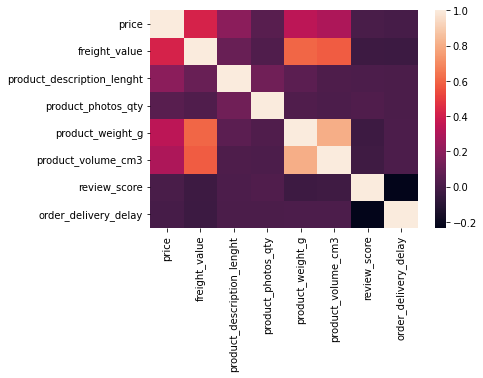

In [291]:
features = [
    "price",
    "freight_value",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_volume_cm3",
    "review_score",
    "order_delivery_delay",
]
sns.heatmap(analytics_df[features].corr())

Preço médio por categoria

<AxesSubplot:xlabel='product_category_name'>

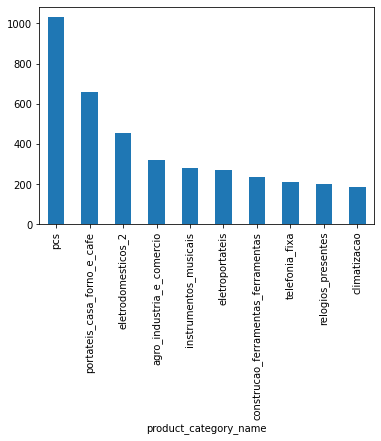

In [292]:
analytics_df.groupby("product_category_name")["price"].mean().sort_values(
    ascending=False
).head(10).plot(kind="bar")

Vendas Mensais

<AxesSubplot:xlabel='order_purchase_month'>

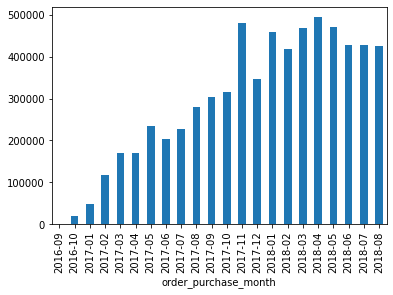

In [293]:
analytics_df.groupby("order_purchase_month")["price"].sum().plot(kind="bar")

<AxesSubplot:xlabel='product_category_name'>

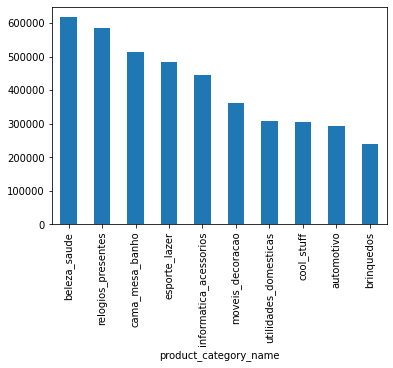

In [294]:
analytics_df.groupby("product_category_name")["price"].sum().sort_values(
    ascending=False
).head(10).plot(kind="bar")

<AxesSubplot:xlabel='customer_state'>

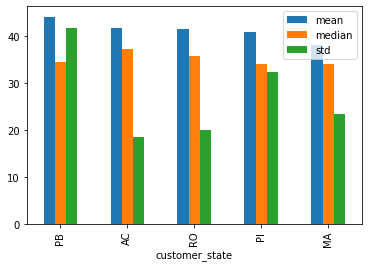

In [295]:
analytics_df.groupby("customer_state")["freight_value"].agg(
    ["mean", "median", "std"]
).sort_values(ascending=False, by="mean").head(5).plot(kind="bar")

<AxesSubplot:xlabel='customer_state'>

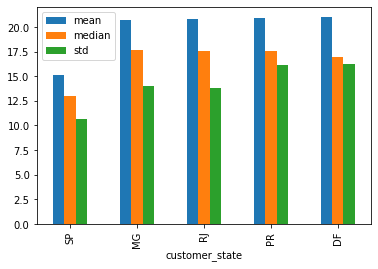

In [296]:
analytics_df.groupby("customer_state")["freight_value"].agg(
    ["mean", "median", "std"]
).sort_values(by="mean").head(5).plot(kind="bar")

<AxesSubplot:xlabel='customer_region'>

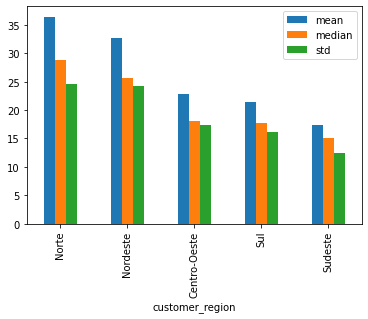

In [297]:
analytics_df.groupby("customer_region")["freight_value"].agg(
    ["mean", "median", "std"]
).sort_values(ascending=False, by="mean").plot(kind="bar")

<AxesSubplot:xlabel='order_delivery_delay', ylabel='freight_value'>

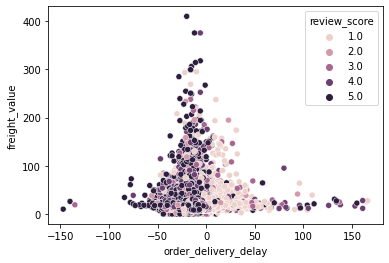

In [298]:
sns.scatterplot(
    data=analytics_df,
    x="order_delivery_delay",
    y="freight_value",
    hue="review_score",
)

Aplicando o teorema de Bayes: Dado que a entrega do pedido foi pontual ou antecipada, qual a probabilidade do pedido receber uma avalição 5?

P(A|B) = P(B|A)P(A)/P(B)

Quebrando o teorema em partes individuais temos:

- P(A): Probabilidade a priori (Prior probability), é a probabilidade de que "A" ocorra.
- P(B|A): Probabilidade condicional (Likelihood), é a probabilidade de que "B" ocorra, dado que "A" é verdade.
- P(B): Probabilidade conjunta (marginalization), é a probabilidade de que "B" é verdade.
- P(A|B): Probabilidade a posterior (Posterior probability), é a probabilidade de que "A" ocorra, dado que "B" é verdade.

Traduzindo nos termos do dataset analisado, temos:

- E = Entrega pontual ou antecipada
- R = Review 5

P(R|E) = P(E|R)P(R)/P(E)





A Priori, P(R):

In [299]:
priori = len(analytics_df[analytics_df["review_score"] == 5]) / len(
    analytics_df["review_score"]
)
priori

0.5743158515895848

Probabilidade Condicional, P(E|R)

In [300]:
likelihood = len(
    analytics_df[
        (analytics_df["order_delivery_delay"] <= 0)
        & (analytics_df["review_score"] == 5)
    ]
) / len(analytics_df[analytics_df["review_score"] == 5])


likelihood

0.9820511173901875

Probabilidade Conjunta, P(E):

In [301]:
marginalization = len(analytics_df[analytics_df["order_delivery_delay"] <= 0]) / len(
    analytics_df["order_delivery_delay"]
)
marginalization

0.9353654938408202

Probabilidade A Posteriori, P(A|B):

In [302]:
posteriori = likelihood * priori / marginalization
posteriori

0.6029808962403643

O mesmo processo que realizamos passo a passo pode ser realizado de forma direta:

Aplicando o teorema de Bayes: Dado que a entrega do pedido foi pontual ou antecipada, qual a probabilidade do pedido receber uma avalição N?

1.0    0.084439
2.0    0.029750
3.0    0.082763
4.0    0.200067
5.0    0.602981
Name: review_score, dtype: float64


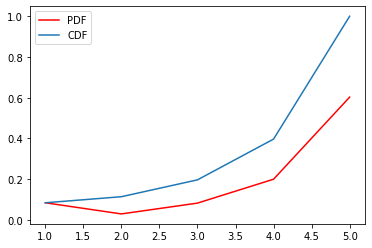

In [303]:
s = analytics_df[analytics_df["order_delivery_delay"] <= 0]
pdf = s["review_score"].value_counts(normalize=True).sort_index()
cdf = pdf.cumsum()

# plotting PDF and CDF
plt.plot(pdf, color="red", label="PDF")
plt.plot(cdf, label="CDF")
plt.legend()

print(pdf)

Dado que a entrega do pedido foi atrasada, qual a probabilidade do pedido receber uma avalição N?

1.0    0.548074
2.0    0.080742
3.0    0.104137
4.0    0.107561
5.0    0.159486
Name: review_score, dtype: float64


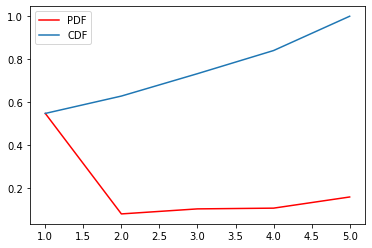

In [306]:
s = analytics_df[analytics_df["order_delivery_delay"] > 0]
pdf = s["review_score"].value_counts().sort_index() / len(s)
cdf = pdf.cumsum()

# plotting PDF and CDF
plt.plot(pdf, color="red", label="PDF")
plt.plot(cdf, label="CDF")
plt.legend()

print(pdf)